In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/TemporAi

/content/drive/MyDrive/TemporAi


In [ ]:
#!pip install darts --quiet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from darts import TimeSeries
from darts.models import StatsForecastAutoETS, StatsForecastAutoARIMA, StatsForecastAutoTheta

In [ ]:
air_passengers = pd.read_csv('air_passengers.csv')
air_passengers_series = TimeSeries.from_dataframe(air_passengers, "ds", "y")

In [ ]:
test_raio = 0.25

In [ ]:
num_test = int(test_raio*len(air_passengers_series))
air_passengers_train, air_passengers_val = air_passengers_series[:-num_test], air_passengers_series[-num_test:]

In [ ]:
all_series_train = {}
all_series_train['air_passengers'] = air_passengers_train
# TODO
# Add other datasets here.

In [ ]:
all_models = {}
all_models['AutoETS'] = StatsForecastAutoETS(season_length=12, model="AZZ")
all_models['AutoARIMA'] = StatsForecastAutoARIMA(season_length=12)
all_models['AutoTheta'] = StatsForecastAutoTheta(season_length=12)

In [ ]:
all_preds = {}
all_preds['air_passengers'] = {}

In [ ]:
for dataset_name, dataset in all_series_train.items():
  for model_name, model in all_models.items():
    print(f"Now fitting, {model_name} on {dataset_name}.")
    model.fit(dataset)
    all_preds[dataset_name][model_name] = model.predict(num_test)

Now fitting, AutoETS on air_passengers.
Now fitting, AutoARIMA on air_passengers.
Now fitting, AutoTheta on air_passengers.


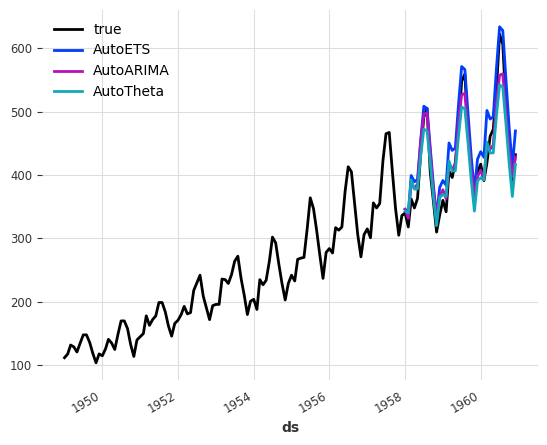

In [ ]:
air_passengers_series.plot(label='true')
for model_name, model in all_models.items():
  all_preds['air_passengers'][model_name].plot(label=model_name)

In [ ]:
from darts.metrics.metrics import mape

In [ ]:
for model_name, model in all_models.items():
  error = mape(air_passengers_val, all_preds['air_passengers'][model_name])
  print(f"error of {model_name} = {error}")

error of AutoETS = 6.896987277178006
error of AutoARIMA = 4.148572030704047
error of AutoTheta = 5.41321166979053
